In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, add_dummy_feature
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
import math

#Questions and Answers
1. Explain any data manipulations you may have performed, if any. Which predictors do
you use? Did you expand the set of predictors? Explain how and why if you did.

- Answer: While working on this project: Some Data Manipulations we performed were:  
  - Making stock returns in percentage %
  - Adding Month and Year to table separately.
  - We ultimately decided not to expand the set of predictors as it would highly increase the runtime of our models
  - We scaled X_train and X_test
  - Split Training and Test Data 
    - X_Train (350780, 43) < 2005
    - X_test   (151856, 43) > 2005


2. Which machine learning methods and techniques have you considered? At the mini-
mum, please try at least four different methods, such as OLS, ridge, lasso, elastic net, random forests, principal component regression, neural network (deep learning), or any other ones.

- Answer:
  - In order to properly evaluate this model and conduct this project we utilized a total of 6 different methods. 
We used Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, PCA, and Random Forest Regression.
We decided to use 6 learning methods rather than 4 as it would ensure we would have a wider range of data and outputs.


3. Compute various performance metrics in your train/validate/test data, such as R2, MSE or RMSE. Which methods seem to work best in sample and out of sample?

- Answer:
  - Top Model Performance:
    - MSE Training: Random Forest
    - MSE Test: ElasticNetCV
    - MSE Training with PCA Reduction: Random Forest
    - MSE Test with PCA Reduction: ElasticNetCV


4. Pick the best model and evaluate its performance in the train sample. Remember that if you want to pick the single best model/method among these and evaluate its performance, you need to make this choice based on a validation sample (NOT a part of the test sample), or use cross-validation in the train sample.

- Answer: 
  - After running all models and utilizing cross-validation in the train sample we came to the conclusion that Random Forest was the best performing model in the train sample. We came to this conclusion by examining all of the models and comparing them to each other relative to their MSE’s. 


5. How much predictability do you find? Which variables are the most important ones?
Would you start a hedge fund based on predictability you have discovered?
This list is not exhaustive. Feel free to add items if you find interesting results.

- Answer: 
  - We found that is was very difficult to  predictability in the models 
Taking into account the results from our Lasso model and Random Forest;
  - The following variables are the most important based off commonality and weights across the feature importance of the Random Forest and the Lasso model:
    - detiss, repurch, price, indrrev, betaarb, rome, season, fscore, ivol, mom12, age
  - After having run the model with only these predictors our models performed worse.
  - We would not start a hedge fund based on predictability we have discovered as our models were not performing well.



# Data Manipulation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Group/Copy of characteristics_anom.csv') 
data.head()

,permno,date,re,size,value,prof,valprof,fscore,debtiss,repurch,...,rome,strev,ivol,betaarb,season,indrrev,ciss,price,age,shvol
0,10006,07/1972,0.028600,0.699925,0.649009,-0.773268,-0.441137,-1.057577,-1.191008,-0.443104,...,0.738251,0.169149,-0.253520,-0.597934,-0.762987,-0.549901,-1.220848,1.117585,1.213013,0.524622
1,10102,07/1972,0.039757,0.538023,1.406381,-0.604513,0.939781,0.432276,-1.191008,-0.443104,...,1.094331,-0.677317,-0.658350,0.556359,-1.199386,-0.482659,-0.027322,-0.683487,1.213013,-0.411568
2,10145,07/1972,-0.062422,1.379123,1.073137,-0.641500,0.334379,0.432276,-1.191008,-0.443104,...,0.280873,-0.095248,0.235483,0.346043,0.557622,-0.108870,-0.970639,0.395970,1.213013,0.102147
3,10153,07/1972,-0.065600,0.186578,1.688356,-0.463498,1.385077,-0.339504,-1.191008,2.255521,...,0.937779,-1.223870,0.596222,0.776458,0.432121,-1.216393,0.660034,-1.280549,1.213013,0.177518
4,10161,07/1972,-0.048933,1.313967,0.667652,-1.170883,-0.898941,-1.057577,-1.191008,-0.443104,...,0.627744,0.944583,-1.145348,-0.350934,-0.680270,0.721773,-0.579507,0.427603,1.213013,-0.645615


In [ ]:
data['re'] = data['re']*100
data.head()

,permno,date,re,size,value,prof,valprof,fscore,debtiss,repurch,...,rome,strev,ivol,betaarb,season,indrrev,ciss,price,age,shvol
0,10006,07/1972,2.860029,0.699925,0.649009,-0.773268,-0.441137,-1.057577,-1.191008,-0.443104,...,0.738251,0.169149,-0.253520,-0.597934,-0.762987,-0.549901,-1.220848,1.117585,1.213013,0.524622
1,10102,07/1972,3.975714,0.538023,1.406381,-0.604513,0.939781,0.432276,-1.191008,-0.443104,...,1.094331,-0.677317,-0.658350,0.556359,-1.199386,-0.482659,-0.027322,-0.683487,1.213013,-0.411568
2,10145,07/1972,-6.242203,1.379123,1.073137,-0.641500,0.334379,0.432276,-1.191008,-0.443104,...,0.280873,-0.095248,0.235483,0.346043,0.557622,-0.108870,-0.970639,0.395970,1.213013,0.102147
3,10153,07/1972,-6.560000,0.186578,1.688356,-0.463498,1.385077,-0.339504,-1.191008,2.255521,...,0.937779,-1.223870,0.596222,0.776458,0.432121,-1.216393,0.660034,-1.280549,1.213013,0.177518
4,10161,07/1972,-4.893333,1.313967,0.667652,-1.170883,-0.898941,-1.057577,-1.191008,-0.443104,...,0.627744,0.944583,-1.145348,-0.350934,-0.680270,0.721773,-0.579507,0.427603,1.213013,-0.645615


In [ ]:
data[['month','year']] = data.date.str.split('/',expand=True)
data.head()

,permno,date,re,size,value,prof,valprof,fscore,debtiss,repurch,...,ivol,betaarb,season,indrrev,ciss,price,age,shvol,month,year
0,10006,07/1972,2.860029,0.699925,0.649009,-0.773268,-0.441137,-1.057577,-1.191008,-0.443104,...,-0.253520,-0.597934,-0.762987,-0.549901,-1.220848,1.117585,1.213013,0.524622,07,1972
1,10102,07/1972,3.975714,0.538023,1.406381,-0.604513,0.939781,0.432276,-1.191008,-0.443104,...,-0.658350,0.556359,-1.199386,-0.482659,-0.027322,-0.683487,1.213013,-0.411568,07,1972
2,10145,07/1972,-6.242203,1.379123,1.073137,-0.641500,0.334379,0.432276,-1.191008,-0.443104,...,0.235483,0.346043,0.557622,-0.108870,-0.970639,0.395970,1.213013,0.102147,07,1972
3,10153,07/1972,-6.560000,0.186578,1.688356,-0.463498,1.385077,-0.339504,-1.191008,2.255521,...,0.596222,0.776458,0.432121,-1.216393,0.660034,-1.280549,1.213013,0.177518,07,1972
4,10161,07/1972,-4.893333,1.313967,0.667652,-1.170883,-0.898941,-1.057577,-1.191008,-0.443104,...,-1.145348,-0.350934,-0.680270,0.721773,-0.579507,0.427603,1.213013,-0.645615,07,1972


In [ ]:
data = data.set_index(['permno','date'])
data.head()

,,re,size,value,prof,valprof,fscore,debtiss,repurch,nissa,accruals,...,ivol,betaarb,season,indrrev,ciss,price,age,shvol,month,year
permno,date,,,,,,,,,,,,,,,,,,,,,
10006,07/1972,2.860029,0.699925,0.649009,-0.773268,-0.441137,-1.057577,-1.191008,-0.443104,-2.053981,0.163833,...,-0.253520,-0.597934,-0.762987,-0.549901,-1.220848,1.117585,1.213013,0.524622,07,1972
10102,07/1972,3.975714,0.538023,1.406381,-0.604513,0.939781,0.432276,-1.191008,-0.443104,0.827987,0.266576,...,-0.658350,0.556359,-1.199386,-0.482659,-0.027322,-0.683487,1.213013,-0.411568,07,1972
10145,07/1972,-6.242203,1.379123,1.073137,-0.641500,0.334379,0.432276,-1.191008,-0.443104,-0.480636,-0.022215,...,0.235483,0.346043,0.557622,-0.108870,-0.970639,0.395970,1.213013,0.102147,07,1972
10153,07/1972,-6.560000,0.186578,1.688356,-0.463498,1.385077,-0.339504,-1.191008,2.255521,-2.121410,-0.502607,...,0.596222,0.776458,0.432121,-1.216393,0.660034,-1.280549,1.213013,0.177518,07,1972
10161,07/1972,-4.893333,1.313967,0.667652,-1.170883,-0.898941,-1.057577,-1.191008,-0.443104,-0.195935,0.463731,...,-1.145348,-0.350934,-0.680270,0.721773,-0.579507,0.427603,1.213013,-0.645615,07,1972


In [ ]:
data.shape

(502636, 46)

In [ ]:
X_var_names = data.columns[1:44]
y_var_name = data.columns[0]
print('X variables: ', X_var_names.values)
print('y variable: ', y_var_name)

X variables:  ['size' 'value' 'prof' 'valprof' 'fscore' 'debtiss' 'repurch' 'nissa'
 'accruals' 'growth' 'aturnover' 'gmargins' 'ep' 'cfp' 'noa' 'inv'
 'invcap' 'igrowth' 'sgrowth' 'lev' 'roaa' 'roea' 'sp' 'mom' 'indmom'
 'valmom' 'valmomprof' 'mom12' 'momrev' 'lrrev' 'valuem' 'nissm' 'roe'
 'rome' 'strev' 'ivol' 'betaarb' 'season' 'indrrev' 'ciss' 'price' 'age'
 'shvol']
y variable:  re


In [ ]:
data = data.astype('float64')

In [ ]:
X_train = data[data['year']<2005].iloc[:,1:44]
y_train = data[data['year']<2005].iloc[:,0]

X_test = data[data['year']>=2005].iloc[:,1:44]
y_test = data[data['year']>=2005].iloc[:,0]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350780, 43) (350780,) (151856, 43) (151856,)


#Linear Regression

In [ ]:
# Linear Regression Scaled
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(scale(X_train),y_train)

y_pred_reg_train = reg.predict(scale(X_train))
mse_reg_train = mean_squared_error(y_train, y_pred_reg_train)
rmse_reg_train = math.sqrt(mse_reg_train)


y_pred_reg_test = reg.predict(scale(X_test))
mse_reg_test = mean_squared_error(y_test, y_pred_reg_test)
rmse_reg_test = math.sqrt(mse_reg_test)

print(f'Linear Regression MSE train error: {mse_reg_train}')
print(f'Linear Regression RMSE train error: {rmse_reg_train}')
print()
print(f'Linear Regression MSE test error: {mse_reg_test}')
print(f'Linear Regression RMSE test error: {rmse_reg_test}')

Linear Regression MSE train error: 124.78967292241403
Linear Regression RMSE train error: 11.17092981458634

Linear Regression MSE test error: 102.87031603768565
Linear Regression RMSE test error: 10.142500482508524


#Ridge Regression

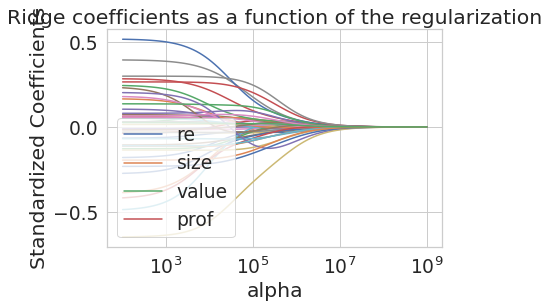

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
import matplotlib.pyplot as plt

ridge = Ridge()
cv_ridge = []
coefs = []
alphas = 10**np.linspace(9,2,100)
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)
    cv_ridge.append(cross_val_score(ridge, scale(X_train), y_train, cv=5, scoring='neg_mean_squared_error').mean())
# Ridge Regression Coefficient Plot
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend(data.columns[:4])



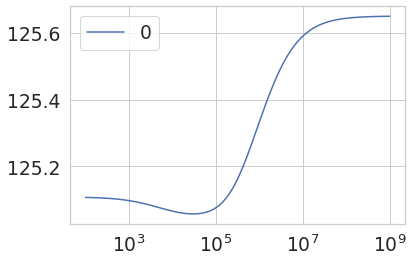

In [ ]:
(-pd.DataFrame(cv_ridge, index=alphas)).plot().set_xscale('log')

In [ ]:
alphas = 10**np.linspace(5,-1,100)
ridgecv = RidgeCV(alphas=alphas) 
ridgecv.fit(scale(X_train), y_train)

y_pred_ridge_train = ridgecv.predict(scale(X_train))
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
rmse_ridge_train = math.sqrt(mse_ridge_train)

y_pred_ridge_test = ridgecv.predict(scale(X_test))
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
rmse_ridge_test = math.sqrt(mse_ridge_test)

print('cv_alpha: ', ridgecv.alpha_)

print(f'Ridge Regression train error: {mse_ridge_train}')
print(f'Ridge Regression RMSE train error: {rmse_ridge_train}')

print(f'Ridge Regression test error: {mse_ridge_test}')
print(f'Ridge Regression RMSE test error: {rmse_ridge_test}')

cv_alpha:  1321.9411484660286
Ridge Regression train error: 124.79020364781847
Ridge Regression RMSE train error: 11.170953569316206
Ridge Regression test error: 102.85394228889928
Ridge Regression RMSE test error: 10.14169326537237


#Lasso Regression

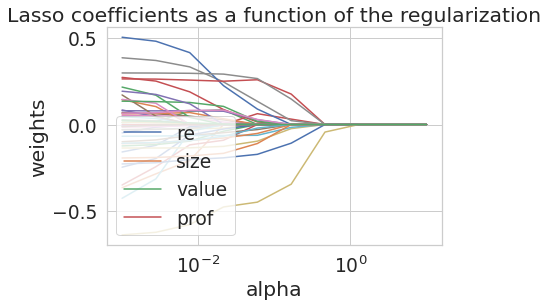

In [ ]:
#Lasso Regression MSE based on Alpha plot
alphas2 = 10**np.linspace(1, -3,10)
lasso = Lasso()
coefs5 = []
cv05 = []

for a in alphas2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs5.append(lasso.coef_)
    cv05.append(cross_val_score(lasso, scale(X_train), y_train, cv=5, scoring='neg_mean_squared_error').mean())
  
ax = plt.gca()
ax.plot(alphas2, coefs5)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.legend(data.columns[:4])

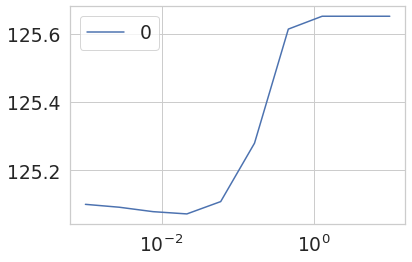

In [ ]:
(-pd.DataFrame(cv05, index=alphas2)).plot().set_xscale('log')

In [ ]:
alphas2 = 10**np.linspace(1,-6,100)
lassocv = LassoCV(alphas=alphas2, cv=5)
lassocv.fit(X_train, y_train)


y_pred_lasso_train = lassocv.predict(scale(X_train))
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
rmse_lasso_train = math.sqrt(mse_lasso_train)

y_pred_lasso_test = lassocv.predict(scale(X_test))
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso_test = math.sqrt(mse_lasso_test)


print(f'Lasso Regression MSE train error: {mse_lasso_train}')
print(f'Lasso Regression RMSE train error: {rmse_lasso_train}')
print(f'Lasso Regression MSE test error: {mse_lasso_test}')
print(f'Lasso Regression RMSE test error: {rmse_lasso_test}')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


Lasso Regression MSE train error: 124.840763543734
Lasso Regression RMSE train error: 11.173216347307251
Lasso Regression MSE test error: 102.7844491268769
Lasso Regression RMSE test error: 10.138266574068611


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [ ]:
#Lasso CV optimal alpha
lassocv.alpha_

0.01484968262254465

In [ ]:
# Lasso MSE based on Lassocv.alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('Mean Squared Error:',mean_squared_error(y_test, lasso.predict(scale(X_test))))

Mean Squared Error: 102.73528723551493


In [ ]:
pd.Series(lasso.coef_, index=data.columns[1:44])

size         -0.000000
value        -0.088022
prof          0.088445
valprof       0.000000
fscore       -0.000000
debtiss       0.036465
repurch      -0.000165
nissa         0.000000
accruals     -0.022429
growth        0.000000
aturnover    -0.000000
gmargins      0.044049
ep           -0.068382
cfp           0.133978
noa           0.000000
inv          -0.052464
invcap        0.029057
igrowth      -0.012508
sgrowth       0.000000
lev          -0.000000
roaa         -0.038737
roea          0.000000
sp            0.000000
mom          -0.106412
indmom        0.080725
valmom       -0.000000
valmomprof    0.000000
mom12         0.285912
momrev       -0.130915
lrrev        -0.063240
valuem        0.306829
nissm        -0.083314
roe           0.115936
rome          0.254304
strev         0.041960
ivol          0.000000
betaarb       0.083863
season        0.294431
indrrev      -0.513741
ciss         -0.079015
price        -0.196670
age          -0.174619
shvol         0.006536
dtype: floa

#ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

alpha_e = 10**np.linspace(2,-9,100)
l1_e = np.linspace(.05,1,20)

elasticcv = ElasticNetCV(alphas=alpha_e, l1_ratio=l1_e, cv=5)
elasticcv.fit(scale(X_train), y_train)

y_pred_elastic_train = elasticcv.predict(scale(X_train))
mse_elastic_train = mean_squared_error(y_train, y_pred_elastic_train)
rmse_elastic_train = math.sqrt(mse_elastic_train)


y_pred_elastic_test = elasticcv.predict(scale(X_test))
mse_elastic_test = mean_squared_error(y_test, y_pred_elastic_test)
rmse_elastic_test = math.sqrt(mse_elastic_test)

print(f'ElasticNet MSE train error: {mse_elastic_train}')
print(f'ElasticNet RMSE train error: {rmse_elastic_train}')
print(f'ElasticNet MSE test error: {mse_elastic_test}')
print(f'ElasticNet RMSE test error: {rmse_elastic_test}')

ElasticNet MSE train error: 124.8351093767429
ElasticNet RMSE train error: 11.17296332119384
ElasticNet MSE test error: 102.66828425890094
ElasticNet RMSE test error: 10.132535924382452


#Random Forest Regression

In [ ]:
# Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(50, max_depth=10)
model = forest.fit(scale(X_train), y_train)
predictions = forest.predict(scale(X_test))

y_pred_tr_Rf = model.predict(scale(X_train))
mse_forest_train = mean_squared_error(y_train,y_pred_tr_Rf)
rmse_forest_train = math.sqrt(mse_forest_train)

mse_forest_test = mean_squared_error(y_test, predictions)
rmse_forest_test = math.sqrt(mse_forest_test)

print(f'Random Forest Regression MSE train error: {mse_forest_train}')
print(f'Random Forest Regression RMSE train error: {rmse_forest_train}')
print(f'Random Forest Regression MSE test error: {mse_forest_test}')
print(f'Random Forest Regression RMSE test error: {rmse_forest_test}')

Random Forest Regression MSE train error: 119.08355264379728
Random Forest Regression RMSE train error: 10.912541071803455
Random Forest Regression MSE train error: 140.32957423431833
Random Forest Regression RMSE train error: 11.846078432726939


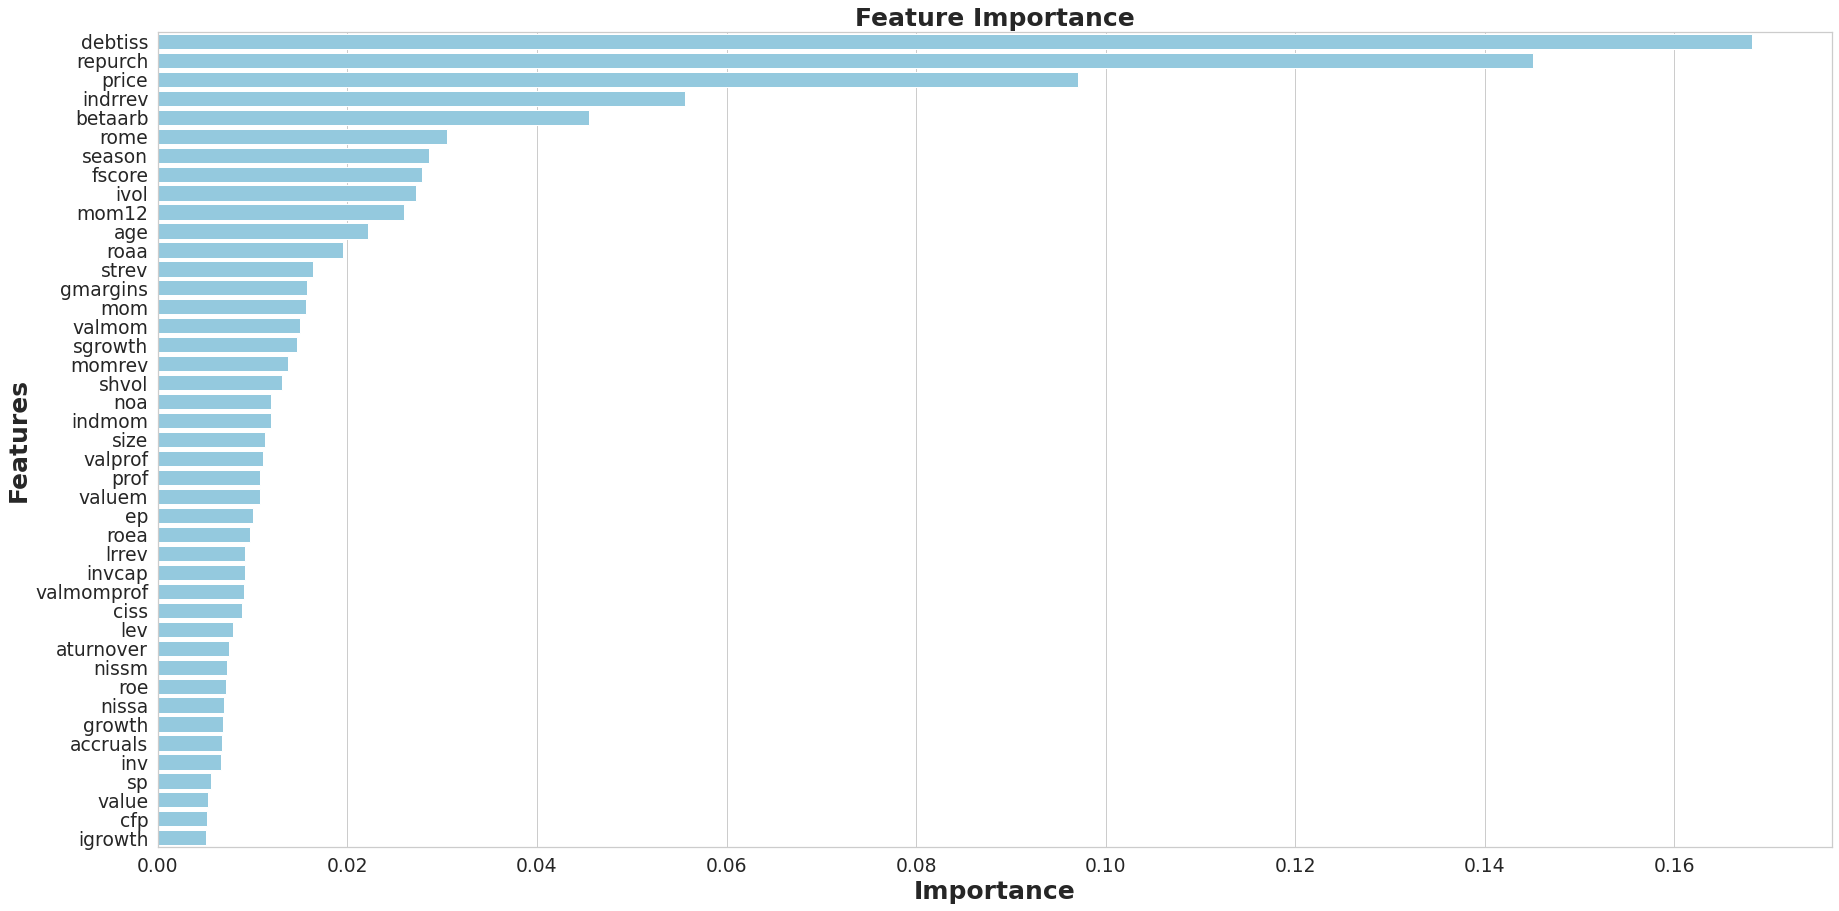

None

,Features,Gini-Importance
0,debtiss,0.168199
1,repurch,0.145119
2,price,0.097096
3,indrrev,0.055639
4,betaarb,0.045497
5,rome,0.030541
6,season,0.028568
7,fscore,0.027868
8,ivol,0.027193
9,mom12,0.025956


In [ ]:
feats = {}
for feature, importance in zip(data.columns[1:44], forest.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

#Final Conclusion Without PCA Table

In [ ]:
#Final Conclusion Table
data = [[mse_reg_train, rmse_reg_train, mse_reg_test, rmse_reg_test], 
        [mse_ridge_train, rmse_ridge_train, mse_ridge_test, rmse_ridge_test],
        [mse_lasso_train, rmse_lasso_train, mse_lasso_test, rmse_lasso_test], 
        [mse_elastic_train, rmse_elastic_train, mse_elastic_test, rmse_elastic_test],
        [mse_forest_train, rmse_forest_train, mse_forest_test, rmse_forest_train]]
df = pd.DataFrame(data, columns=['MSE Training', 'RMSE Training', 'MSE Test', 'RMSE Test'])

final_result_table = df.rename(index={0: 'Linear Regression', 1:'Ridge Regression', 2: 'Lasso Regression', 3: 'ElasticNetCV', 4:'Random Forest'})
final_result_table.head()

,MSE Training,RMSE Training,MSE Test,RMSE Test
Linear Regression,124.789673,11.170930,102.870316,10.142500
Ridge Regression,124.790204,11.170954,102.853942,10.141693
Lasso Regression,124.840764,11.173216,102.784449,10.138267
ElasticNetCV,124.835109,11.172963,102.668284,10.132536
Random Forest,119.083553,10.912541,140.329574,10.912541


#Second Trial After Variable Reduction Using PCA

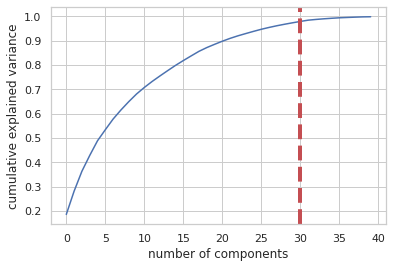

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.185814,0.185814
1,0.281258,0.095444
2,0.363270,0.082012
3,0.428143,0.064874
4,0.488661,0.060517
5,0.534022,0.045362
6,0.578037,0.044014
7,0.615227,0.037191
8,0.649341,0.034114
9,0.680940,0.031599


In [ ]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=40)
pca_test.fit(scale(X_train))
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=30, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [ ]:
pca = PCA(n_components=30)
pca.fit(scale(X_train))
X_train_pca = pca.transform(scale(X_train))
X_test_pca = pca.transform(scale(X_test))
print(X_train_pca.shape, X_test_pca.shape)

(350780, 30) (151856, 30)


#Linear Regression PCA

In [ ]:
# Linear Regression Scaled
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg2 = LinearRegression()
reg2.fit(scale(X_train_pca),y_train)

y_pred_reg_train2 = reg2.predict(scale(X_train_pca))
mse_reg_train2 = mean_squared_error(y_train, y_pred_reg_train2)
rmse_reg_train2 = math.sqrt(mse_reg_train2)


y_pred_reg_test2 = reg2.predict(scale(X_test_pca))
mse_reg_test2 = mean_squared_error(y_test, y_pred_reg_test2)
rmse_reg_test2 = math.sqrt(mse_reg_test2)

print(f'Linear Regression MSE train error: {mse_reg_train2}')
print(f'Linear Regression RMSE train error: {rmse_reg_train2}')
print()
print(f'Linear Regression MSE test error: {mse_reg_test2}')
print(f'Linear Regression RMSE test error: {rmse_reg_test2}')

Linear Regression MSE train error: 124.87376513591269
Linear Regression RMSE train error: 11.174693066742938

Linear Regression MSE test error: 102.76966681942501
Linear Regression RMSE test error: 10.137537512602606


#Ridge PCA

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

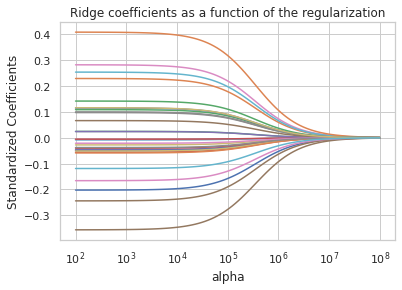

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
import matplotlib.pyplot as plt

ridge2 = Ridge()
cv_ridge2 = []
coefs2 = []
alphas2 = 10**np.linspace(8,2,100)
for a in alphas2:
    ridge2.set_params(alpha=a)
    ridge2.fit(scale(X_train_pca), y_train)
    coefs2.append(ridge2.coef_)
    cv_ridge2.append(cross_val_score(ridge2, scale(X_train_pca), y_train, cv=5, scoring='neg_mean_squared_error').mean())
# Ridge Regression Coefficient Plot
ax = plt.gca()
ax.plot(alphas2, coefs2)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of the regularization')

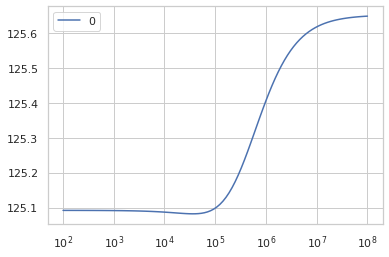

In [ ]:
(-pd.DataFrame(cv_ridge2, index=alphas2)).plot().set_xscale('log')

In [ ]:
alphas2 = 10**np.linspace(5,-1,100)
ridgecv2 = RidgeCV(alphas=alphas2) 
ridgecv2.fit(scale(X_train_pca), y_train)

y_pred_ridge_train2 = ridgecv2.predict(scale(X_train_pca))
mse_ridge_train2 = mean_squared_error(y_train, y_pred_ridge_train2)
rmse_ridge_train2 = math.sqrt(mse_ridge_train2)

y_pred_ridge_test2 = ridgecv2.predict(scale(X_test_pca))
mse_ridge_test2 = mean_squared_error(y_test, y_pred_ridge_test2)
rmse_ridge_test2 = math.sqrt(mse_ridge_test2)

print('cv_alpha: ', ridgecv2.alpha_)

print(f'Ridge Regression train error: {mse_ridge_train2}')
print(f'Ridge Regression RMSE train error: {rmse_ridge_train2}')

print(f'Ridge Regression test error: {mse_ridge_test2}')
print(f'Ridge Regression RMSE train error: {rmse_ridge_test2}')

cv_alpha:  6135.907273413176
Ridge Regression train error: 124.92024246074709
Ridge Regression RMSE train error: 11.176772452758762
Ridge Regression test error: 102.70652331083558
Ridge Regression RMSE train error: 10.13442269252845


#Lasso PCA

Text(0.5, 1.0, 'Lasso coefficients as a function of the regularization')

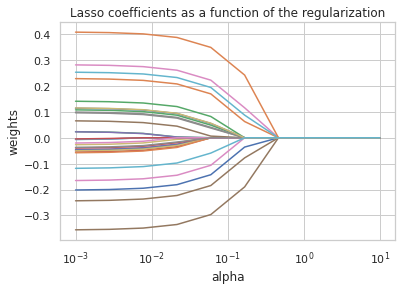

In [ ]:
#Lasso Regression MSE based on Alpha plot
alphas2 = 10**np.linspace(1, -3,10)
lasso2 = Lasso()
coefs52 = []
cv052 = []

for a in alphas2:
    lasso2.set_params(alpha=a)
    lasso2.fit(scale(X_train_pca), y_train)
    coefs52.append(lasso2.coef_)
    cv052.append(cross_val_score(lasso2, scale(X_train_pca), y_train, cv=5, scoring='neg_mean_squared_error').mean())
  
ax = plt.gca()
ax.plot(alphas2, coefs52)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')

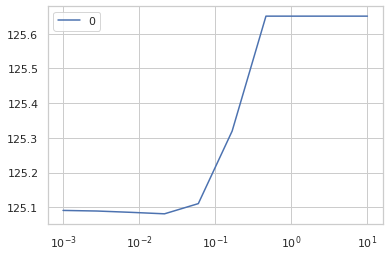

In [ ]:
(-pd.DataFrame(cv052, index=alphas2)).plot().set_xscale('log')

In [ ]:
alphas2 = 10**np.linspace(1,-6,100)
lassocv2 = LassoCV(alphas=alphas2, cv=5)
lassocv2.fit(scale(X_train_pca), y_train)


y_pred_lasso_train2 = lassocv2.predict(scale(X_train_pca))
mse_lasso_train2 = mean_squared_error(y_train, y_pred_lasso_train2)
rmse_lasso_train2 = math.sqrt(mse_lasso_train2)

y_pred_lasso_test2 = lassocv2.predict(scale(X_test_pca))
mse_lasso_test2 = mean_squared_error(y_test, y_pred_lasso_test2)
rmse_lasso_test2 = math.sqrt(mse_lasso_test2)


print(f'Lasso Regression MSE train error: {mse_lasso_train2}')
print(f'Lasso Regression RMSE train error: {rmse_lasso_train2}')
print(f'Lasso Regression MSE test error: {mse_lasso_test2}')
print(f'Lasso Regression RMSE test error: {rmse_lasso_test2}')

Lasso Regression MSE train error: 124.88957697095083
Lasso Regression RMSE train error: 11.17540052843525
Lasso Regression MSE test error: 102.64261689264013
Lasso Regression RMSE test error: 10.131269263653007


In [ ]:
lassocv2.alpha_

0.024201282647943835

In [ ]:
# Lasso MSE based on Lassocv.alpha
lasso2.set_params(alpha=lassocv2.alpha_)
lasso2.fit(scale(X_train_pca), y_train)
print('Mean Squared Error:',mean_squared_error(y_test, lasso2.predict(scale(X_test_pca))))

Mean Squared Error: 102.64261689264013


#ElasticNet PCA

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

alpha_e2 = 10**np.linspace(2,-9,100)
l1_e2 = np.linspace(.05,1,20)

elasticcv2 = ElasticNetCV(alphas=alpha_e2, l1_ratio=l1_e2, cv=5)
elasticcv2.fit(scale(X_train_pca), y_train)

y_pred_elastic_train2 = elasticcv2.predict(scale(X_train_pca))
mse_elastic_train2 = mean_squared_error(y_train, y_pred_elastic_train2)
rmse_elastic_train2 = math.sqrt(mse_elastic_train2)


y_pred_elastic_test2 = elasticcv2.predict(scale(X_test_pca))
mse_elastic_test2 = mean_squared_error(y_test, y_pred_elastic_test2)
rmse_elastic_test2 = math.sqrt(mse_elastic_test2)

print(f'ElasticNet MSE train error: {mse_elastic_train2}')
print(f'ElasticNet RMSE train error: {rmse_elastic_train2}')
print(f'ElasticNet MSE test error: {mse_elastic_test2}')
print(f'ElasticNet RMSE test error: {rmse_elastic_test2}')

ElasticNet MSE train error: 124.8845634306433
ElasticNet RMSE train error: 11.17517621474683
ElasticNet MSE test error: 102.62891970841174
ElasticNet RMSE test error: 10.130593255501463


#Random Forest PCA

In [ ]:
# Apply Random Forest Regressor Using best parameters from GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest2 = RandomForestRegressor(50, max_depth=10)
model2 = forest2.fit(scale(X_train_pca), y_train)
predictions2 = forest2.predict(scale(X_test_pca))

y_pred_tr_Rf2 = model2.predict(scale(X_train_pca))
mse_forest_train2 = mean_squared_error(y_train,y_pred_tr_Rf2)
rmse_forest_train2 = math.sqrt(mse_forest_train2)

mse_forest_test2 = mean_squared_error(y_test, predictions2)
rmse_forest_test2= math.sqrt(mse_forest_test2)

print(f'Random Forest Regression MSE train error: {mse_forest_train2}')
print(f'Random Forest Regression RMSE train error: {rmse_forest_train2}')
print(f'Random Forest Regression MSE train error: {mse_forest_test2}')
print(f'Random Forest Regression RMSE train error: {rmse_forest_test2}')

Random Forest Regression MSE train error: 120.62087343329837
Random Forest Regression RMSE train error: 10.98275345408875
Random Forest Regression MSE train error: 102.66005107405562
Random Forest Regression RMSE train error: 10.132129641593401


# Final Conclusion With PCA

In [ ]:
#Final Conclusion Table
data2 = [[mse_reg_train2, rmse_reg_train2, mse_reg_test2, rmse_reg_test2], 
        [mse_ridge_train2, rmse_ridge_train2, mse_ridge_test2, rmse_ridge_test2],
        [mse_lasso_train2, rmse_lasso_train2, mse_lasso_test2, rmse_lasso_test2], 
        [mse_elastic_train2, rmse_elastic_train2, mse_elastic_test2, rmse_elastic_test2],
         [mse_forest_train2, rmse_forest_train2, mse_forest_test2, rmse_forest_train2]]
df2 = pd.DataFrame(data2, columns=['MSE Training_PCA', 'RMSE Training_PCA', 'MSE Test_PCA', 'RMSE Test_PCA'])
final_result_table2 = df2.rename(index={0: 'Linear Regression', 1:'Ridge Regression', 2: 'Lasso Regression', 3: 'ElasticNetCV', 4:'Random Forest'})
final_result_table2.head()

,MSE Training_PCA,RMSE Training_PCA,MSE Test_PCA,RMSE Test_PCA
Linear Regression,124.873765,11.174693,102.769667,10.137538
Ridge Regression,124.920242,11.176772,102.706523,10.134423
Lasso Regression,124.889577,11.175401,102.642617,10.131269
ElasticNetCV,124.884563,11.175176,102.628920,10.130593
Random Forest,120.620873,10.982753,102.660051,10.982753


#Final Result Original and PCA

In [ ]:
final = pd.concat([final_result_table, final_result_table2], axis = 1)
final 

,MSE Training,RMSE Training,MSE Test,RMSE Test,MSE Training_PCA,RMSE Training_PCA,MSE Test_PCA,RMSE Test_PCA
Linear Regression,124.789673,11.170930,102.870316,10.142500,124.873765,11.174693,102.769667,10.137538
Ridge Regression,124.790204,11.170954,102.853942,10.141693,124.920242,11.176772,102.706523,10.134423
Lasso Regression,124.840764,11.173216,102.784449,10.138267,124.889577,11.175401,102.642617,10.131269
ElasticNetCV,124.835109,11.172963,102.668284,10.132536,124.884563,11.175176,102.628920,10.130593
Random Forest,119.083553,10.912541,140.329574,10.912541,120.620873,10.982753,102.660051,10.982753
